In [2]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the file, checking contents

cust=pd.read_csv("CLV.csv")
cust.head()

# Units of 'INCOME' and 'SPEND' are '$ x 1000'. INCOME is the annual income of each customer, and SPEND is the annual expenditure on the retail site.

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
# Descriptive statistics

cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


We have 303 customers in all. The mean average income is about 245K, min is 126K and max is 417K. So it seems like we have a collection of extremely wealthy customers! (Mean household income in the US is about 60K)

Average spending per customer is about $ 150K - which is insanely high for a single e-retail website (wonder what they sell!).

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Income or spend')

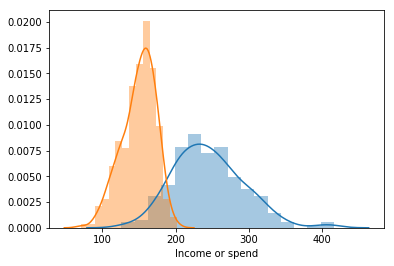

In [5]:
# Plotting income and spending for all customers in a single graph

cust_income=sns.distplot(cust["INCOME"])
cust_spend=sns.distplot(cust["SPEND"])
plt.xlabel('Income or spend')

# Plot is correct, but it throws a warning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`.

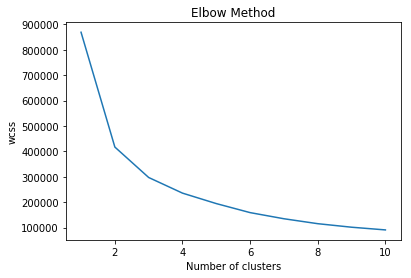

In [6]:
# Elbow method to detemine number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(cust)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Within Clusters Sum of Squares (WCSS) keeps decreasing steeply until the elbow formation at k=6. Hence, we select number of clusters as 6.

In [7]:
 # Fitting kmeans for k=6
    
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km6.fit_predict(cust)

len(y_means)

# 303 customers have been divided among clusters 0 to 5.

303

In [8]:
# Creating a new dataframe with INCOME, SPEND (X) and y_means (Y)

type(y_means)
type(cust)
# y_means is an array, cust is a dataframe.

# Converting y_means to a dataframe
y = pd.DataFrame(data=y_means, index=range(0,303))
# During conversion, column name is 0. Let's change it to a meaningful name 'y'.
y.rename(columns={0:'y'}, inplace=True)
y

df=cust.join(y)
df.head()

# Now our X values are in the first two columns, and y values (predicted cluster) are in the third column.

,INCOME,SPEND,y
0,233,150,4
1,250,187,4
2,204,172,3
3,236,178,4
4,354,163,5


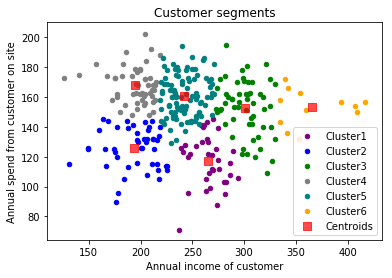

In [15]:
# Visualizing of clusters


plt.scatter(df.INCOME[df.y==0],df.SPEND[df.y==0],s=20, c='purple',label='Cluster1')
plt.scatter(df.INCOME[df.y==1],df.SPEND[df.y==1],s=20, c='blue',label='Cluster2')
plt.scatter(df.INCOME[df.y==2],df.SPEND[df.y==2],s=20, c='green',label='Cluster3')
plt.scatter(df.INCOME[df.y==3],df.SPEND[df.y==3],s=20, c='grey',label='Cluster4')
plt.scatter(df.INCOME[df.y==4],df.SPEND[df.y==4],s=20, c='teal',label='Cluster5')
plt.scatter(df.INCOME[df.y==5],df.SPEND[df.y==5],s=20, c='orange',label='Cluster6')


plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()